**Подключаем библиотеки**

In [4]:
import pandas as pd

**Основные концепции Pandas**

- Series - одномерный массив
- Dataframe - таблица, двумерный массив
- Index - заголовки строк
- Label - названия столбцов, переменные

In [5]:
pd.DataFrame([[1,5,6,3], [1,5,6,3]], index=['station_1', 'station_2'], columns=['wind', 'solar', 'pressure', 'speed'])

,wind,solar,pressure,speed
station_1,1,5,6,3
station_2,1,5,6,3


**Загружаем и обрабатываем датафрейм**

In [92]:
# encoding='1251' - кодировка для Винды
df = pd.read_csv('data/data.csv', encoding='1251')

In [14]:
# df.head(3) - первые строки, а tail - последние строки
df.tail(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,NaN,NaN,48,1,1.00
4461,2022-08-12,21:46:08,5694,18002542,18,9907,Розничная реализация,15,25673,БЕЛЬВЕДЕР ЛАК П/ОБГРЫЗАНИЯ НОГТЕЙ 8МЛ. [BELWEDER],Катрен г.Химки,BELWEDER NORD SIA,1.00,238.62,346.00,34.00,9.00,200010027618.00,48,1,1.00


In [ ]:
# хотим отобразить все столбцы, без сокрытия
pd.set_option('display.max_columns', 40)

In [13]:
# меняем отображение чисел с научных на нормальные
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# открыть документацию
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

In [ ]:
# данные о выполненной функции - здесь присвоили 40 столбцов
pd.get_option('display.max_columns')

40

In [10]:
# типы данных
df.dtypes

DR_Dat         object
DR_Tim         object
DR_NChk         int64
DR_NDoc         int64
DR_Apt          int64
DR_Kkm          int64
DR_TDoc        object
DR_TPay         int64
DR_CDrugs       int64
DR_NDrugs      object
DR_Suppl       object
DR_Prod        object
DR_Kol        float64
DR_CZak       float64
DR_CRoz       float64
DR_SDisc      float64
DR_CDisc      float64
DR_BCDisc     float64
DR_TabEmpl      int64
DR_VZak         int64
DR_Pos        float64
dtype: object

In [ ]:
# форма матрицы
df.shape

(4462, 21)

In [ ]:
# количество ячеек
df.size

93702

In [191]:
4462*21

93702

In [ ]:
# смотрим какие здесь индексы
df.index

RangeIndex(start=0, stop=4462, step=1)

In [15]:
pd.DataFrame([[1,5,6,3], [1,5,6,3]], index=['station_1', 'station_2'], columns=['wind', 'solar', 'pressure', 'speed']).index

Index(['station_1', 'station_2'], dtype='object')

In [ ]:
# смотрим названия колонок
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

In [95]:
# выборем нужные нам столбцы
our_cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_NDrugs', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_TPay', 'DR_CDrugs', 'DR_Suppl', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl', 'DR_VZak', 'DR_Pos']

In [96]:
# отфильтруем выбранные столбцы из датафрейма
df = df[our_cols]

In [20]:
df.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_NDrugs,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_TPay,DR_CDrugs,DR_Suppl,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [21]:
df.shape

(4462, 18)

In [97]:
# изменим название столбцов
df.columns = ['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol',
       'zak', 'roz', 'disc', 'pay_type', 'drug_id', 'suppl', 'disc_id', 'disc_barcode', 'empl', 'vzak', 'pos']

In [98]:
df

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,NaN,NaN,48,1,1.00


In [24]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id         float64
disc_barcode    float64
empl              int64
vzak              int64
pos             float64
dtype: object

In [ ]:
# тип данных конкретного столбца
df['disc_barcode'].dtype

dtype('float64')

In [29]:
# меняем тип данных столбца
df['disc_barcode'] = df['disc_barcode'].astype('str')
df['disc_barcode'].head()

0    200000000492
1    200010010204
2    200010010204
3    200010010204
4    200000000492
Name: disc_barcode, dtype: object

In [99]:
# меняем тип данных и убираем .0 в конце
df['disc_barcode'] = df['disc_barcode'].astype('str').replace(r'\.0', '', regex=True)

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\326741739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disc_barcode'] = df['disc_barcode'].astype('str').replace(r'\.0', '', regex=True)


In [36]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id          object
disc_barcode     object
empl              int64
vzak              int64
pos             float64
dtype: object

In [100]:
# то же делаем с ['disc_id'] . Не можем в интеджер, потому что есть Nan
df['disc_id'] = df['disc_id'].astype('str').replace(r'\.0', '', regex=True)

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\3321816756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disc_id'] = df['disc_id'].astype('str').replace(r'\.0', '', regex=True)


In [101]:
df

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,nan,nan,48,1,1.00


In [ ]:
# меняем формат даты. так не выйдет, формат не дата
df['dt'].dt

AttributeError: Can only use .dt accessor with datetimelike values

In [102]:
# Переводим формат в дату, меняем формат отображения
df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\3864784254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')


In [ ]:
# можно смотреть всякие датовые атрибуты
pd.to_datetime(df['dt']).dt.day_of_year

0       223
1       223
2       223
3       223
4       223
       ... 
4457    224
4458    224
4459    224
4460    224
4461    224
Name: dt, Length: 4462, dtype: int32

In [41]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id          object
disc_barcode     object
empl              int64
vzak              int64
pos             float64
dtype: object

In [103]:
df

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,1,1.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,1,1.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,1,1.00
4460,12.08.2022,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,nan,nan,48,1,1.00


In [43]:
pd.to_datetime(df['dt']).dt.day_of_week

0       1
1       1
2       1
3       1
4       1
       ..
4457    3
4458    3
4459    3
4460    3
4461    3
Name: dt, Length: 4462, dtype: int32

In [44]:
# загрузим снова таблицу. Эксперимент
df2 = pd.read_csv('data/data.csv', encoding='1251')

In [ ]:
# заменили столбец нашего датафрейма на столбец другого датафрейма
df['dt'] = pd.to_datetime(df2['DR_Dat']).dt.strftime('%d.%m.%Y')

In [46]:
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00


In [ ]:
# смотрим, какие в df['vzak'] уникальные значения
df['vzak'].unique()

array([1, 2], dtype=int64)

In [104]:
# поменяем значения в столбце
df['vzak'] = df['vzak'].astype('str').replace('1', 'Обычный').replace('2', 'Интернет')

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\2595199817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vzak'] = df['vzak'].astype('str').replace('1', 'Обычный').replace('2', 'Интернет')


In [49]:
df['vzak'].unique()

array(['Обычный', 'Интернет'], dtype=object)

In [50]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00


In [ ]:
# есть ли пропуски в ячейках
df.isna()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# есть ли пропуски в столбцах, хотя бы один на столбец
df.isna().any()

dt              False
c_time          False
nchk            False
ndoc            False
apt             False
drug            False
kol             False
zak             False
roz             False
disc            False
pay_type        False
drug_id         False
suppl           False
disc_id         False
disc_barcode    False
empl            False
vzak            False
pos             False
dtype: bool

In [52]:
df2.isna().any()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc       True
DR_BCDisc      True
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [55]:
# ставим 0 вместо НаН
df2.fillna(0).isna().any()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc      False
DR_BCDisc     False
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [59]:
# отбираем строки с пропусками, по оси строк

df3 = df2[df2.isna().values.any(axis=1)]
df2.isna().values.shape

(4462, 21)

In [57]:
df3

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
15,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,1.00
16,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,2.00
20,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,14120,ЛАКТОФИЛЬТРУМ 500МГ. №60 ТАБ.,Пульс,АВВА РУС ОАО,1.00,408.63,560.00,0.00,NaN,NaN,205,1,1.00
21,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,78641,ФЕСТАЛ №40 ДРАЖЕ,ВИТТА КОМПАНИ ООО,SANOFI,1.00,333.74,458.00,0.00,NaN,NaN,205,1,2.00
22,2022-08-11,11:36:05,2182,2004598,2,22577,Розничная реализация,15,18849,ДОКТОР МОМ №20 ПАСТИЛКИ МАЛИНА,Пульс,Юник Фармасьютикал Лабораториз (Отделение Дж.Б...,1.00,141.55,200.00,0.00,NaN,NaN,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,2022-08-12,21:39:23,5689,18002542,18,9907,Розничная реализация,18,28488,АЛЬБАДЕНТ ОСВЕЖИТЕЛЬ Д/РТА ЛИМОН 35МЛ. СПРЕЙ,Здравсервис,"ХБО при РАН ""Вита""",1.00,62.34,97.00,0.00,NaN,NaN,48,1,1.00
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00


In [60]:
df3.fillna(0).head(5)[['DR_CDisc']]

,DR_CDisc
15,0.00
16,0.00
20,0.00
21,0.00
22,0.00


In [ ]:
# Или можно на место пропусков ставить что-то. Интерполяция заданным методом. Здесь - 
df2['DR_CDisc'].interpolate(method='linear')

0      925.00
1        9.00
2        9.00
3        9.00
4      925.00
        ...  
4457     9.00
4458     9.00
4459     9.00
4460     9.00
4461     9.00
Name: DR_CDisc, Length: 4462, dtype: float64

In [ ]:
# Здесь  - кубический сплайн
df2['DR_CDisc'].interpolate(method='cubic')

0      925.00
1        9.00
2        9.00
3        9.00
4      925.00
        ...  
4457     6.98
4458     5.97
4459     5.64
4460     6.48
4461     9.00
Name: DR_CDisc, Length: 4462, dtype: float64

In [63]:
df2.shape

(4462, 21)

In [ ]:
# Удаление пропусков. Здесь столбцы, по умолчанию - строки
df2.dropna(axis=1).shape

(4462, 19)

**Exploratory data analysis - разведочный анализ данных**

In [90]:
import pandas as pd

In [93]:
df

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,NaN,NaN,48,1,1.00


In [ ]:
# так как  disc_id строка, то НаН в ней строковые, не нуллы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            4462 non-null   object 
 1   c_time        4462 non-null   object 
 2   nchk          4462 non-null   int64  
 3   ndoc          4462 non-null   int64  
 4   apt           4462 non-null   int64  
 5   drug          4462 non-null   object 
 6   kol           4462 non-null   float64
 7   zak           4462 non-null   float64
 8   roz           4462 non-null   float64
 9   disc          4462 non-null   float64
 10  pay_type      4462 non-null   int64  
 11  drug_id       4462 non-null   int64  
 12  suppl         4462 non-null   object 
 13  disc_id       4462 non-null   object 
 14  disc_barcode  4462 non-null   object 
 15  empl          4462 non-null   int64  
 16  vzak          4462 non-null   object 
 17  pos           4462 non-null   float64
dtypes: float64(5), int64(6), obj

In [ ]:
# описательные статистики 
df.describe()

,nchk,ndoc,apt,kol,zak,roz,disc,pay_type,drug_id,empl,pos
count,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00
mean,4903.14,10842995.33,10.84,1.03,241.64,306.05,10.56,16.90,259227.09,91.74,2.68
std,1839.70,6107181.40,6.11,0.54,454.56,532.17,31.37,1.45,299073.90,108.08,2.75
min,1698.00,2004595.00,2.00,0.01,0.01,0.01,0.00,15.00,3.00,25.00,1.00
25%,4187.00,6003620.00,6.00,1.00,36.64,52.00,0.00,15.00,29060.00,37.00,1.00
50%,4877.50,11007039.00,11.00,1.00,103.78,137.00,0.00,18.00,187304.00,53.00,2.00
75%,5472.75,18002536.00,18.00,1.00,299.06,391.75,7.00,18.00,377589.00,123.00,3.00
max,8490.00,18002543.00,18.00,20.00,11851.13,12345.00,650.00,18.00,1504498.00,605.00,24.00


In [107]:
# булевы данные
df['pay_type'].value_counts()

pay_type
18    2820
15    1642
Name: count, dtype: int64

In [ ]:
# номера аптек с подсчетом. номер столбца можно написать иначе
df.apt.value_counts()

apt
18    1207
2      979
11     870
6      511
13     322
17     243
15     177
7      153
Name: count, dtype: int64

In [ ]:
# любой столбец
df.ndoc

0        2004598
1        2004598
2        2004598
3        2004598
4        2004598
          ...   
4457    18002542
4458    18002542
4459    18002542
4460    18002542
4461    18002542
Name: ndoc, Length: 4462, dtype: int64

In [110]:
# номера аптек с подсчетом и приводом к %
df.apt.value_counts(normalize=True)

apt
18   0.27
2    0.22
11   0.19
6    0.11
13   0.07
17   0.05
15   0.04
7    0.03
Name: proportion, dtype: float64

In [ ]:
# pos - номер позиций в чеке. Какие есть уник значения?
df.pos.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 23., 24., 22.])

In [113]:
# оценим распределение количества товаров по номерам позиций в чеке
df.pos.value_counts()

pos
1.00     2019
2.00      971
3.00      528
4.00      301
5.00      178
6.00      117
7.00       76
8.00       56
9.00       42
10.00      37
11.00      30
12.00      25
13.00      21
14.00      17
15.00      14
16.00       9
17.00       7
18.00       4
19.00       3
20.00       2
21.00       2
23.00       1
24.00       1
22.00       1
Name: count, dtype: int64

In [116]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 10.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

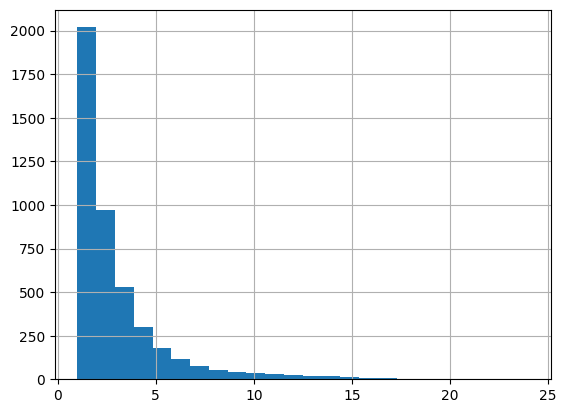

In [123]:
# визуализация в Пандас! Гистограмма
df.pos.hist(bins=24)

<Axes: >

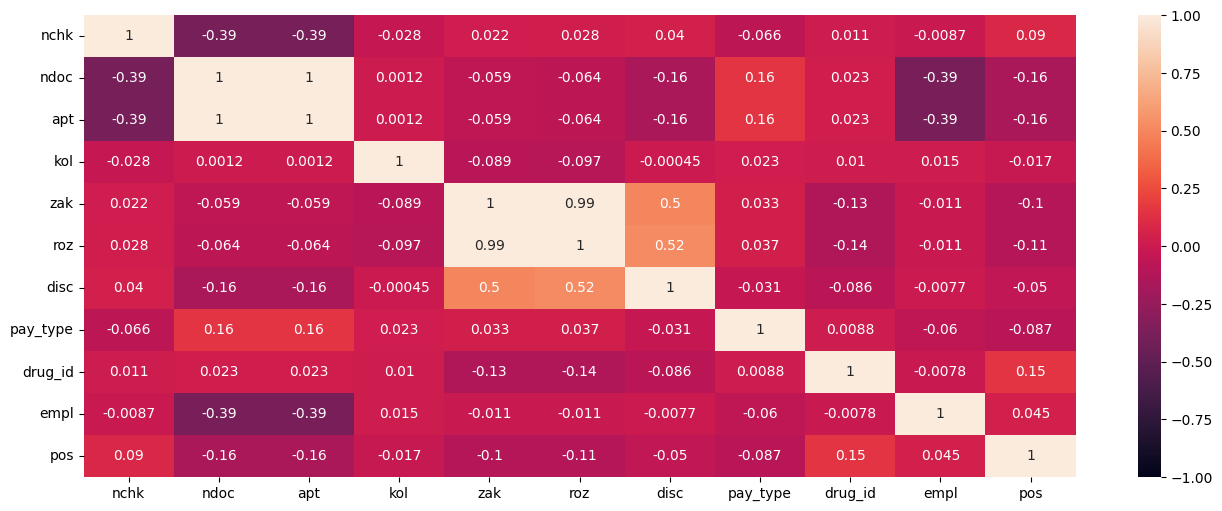

In [ ]:
# хитмап корреляции. Корреляционная матрица. Запомнить!!!!
plt.figure(figsize=(16, 6)) #сделали область графика не 8х8, как по умолчанию, а 16х6. В таком виде только на 1 ячейку
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)

In [ ]:
# В таком виде такой вид будет установлен на весь ноутбук. Запомнить!
plt.rcParams['figure.figsize'] = (16, 6)

<Axes: >

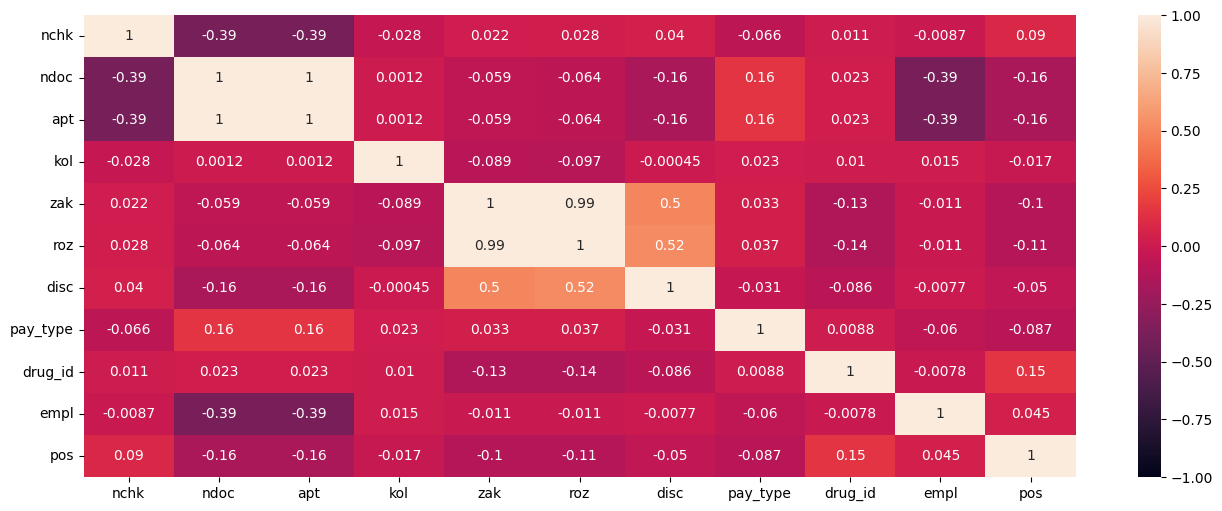

In [140]:
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)

In [141]:
df.c_time

0       10:15:35
1       10:27:46
2       10:27:46
3       10:27:46
4       10:33:56
          ...   
4457    21:40:17
4458    21:40:59
4459    21:43:48
4460    21:44:46
4461    21:46:08
Name: c_time, Length: 4462, dtype: object

In [ ]:
# вытаскиваем час из времени, вставляем в новый столбец
df['hour'] = pd.to_datetime(df.c_time).dt.hour

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\2984645179.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df.c_time).dt.hour
C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\2984645179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df.c_time).dt.hour


In [144]:
df['hour']

0       10
1       10
2       10
3       10
4       10
        ..
4457    21
4458    21
4459    21
4460    21
4461    21
Name: hour, Length: 4462, dtype: int32

In [145]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00,10
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00,10
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00,10
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10


In [153]:
# считаем количество проданных товаров в рамках каждого часа. Группировка 
gr = df.groupby(['hour'])['kol'].agg(sum)
# groupby(['hour']) - столбец группировки
# ['kol'] - столбец, который считаем
# agg(sum) аггрегатная функция

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\337972983.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gr = df.groupby(['hour'])['kol'].agg(sum)


In [154]:
gr

hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
13   422.80
14   358.30
15   432.97
16   375.88
17   375.45
18   457.50
19   419.29
20   388.57
21    97.71
22     1.00
Name: kol, dtype: float64

<Axes: ylabel='kol'>

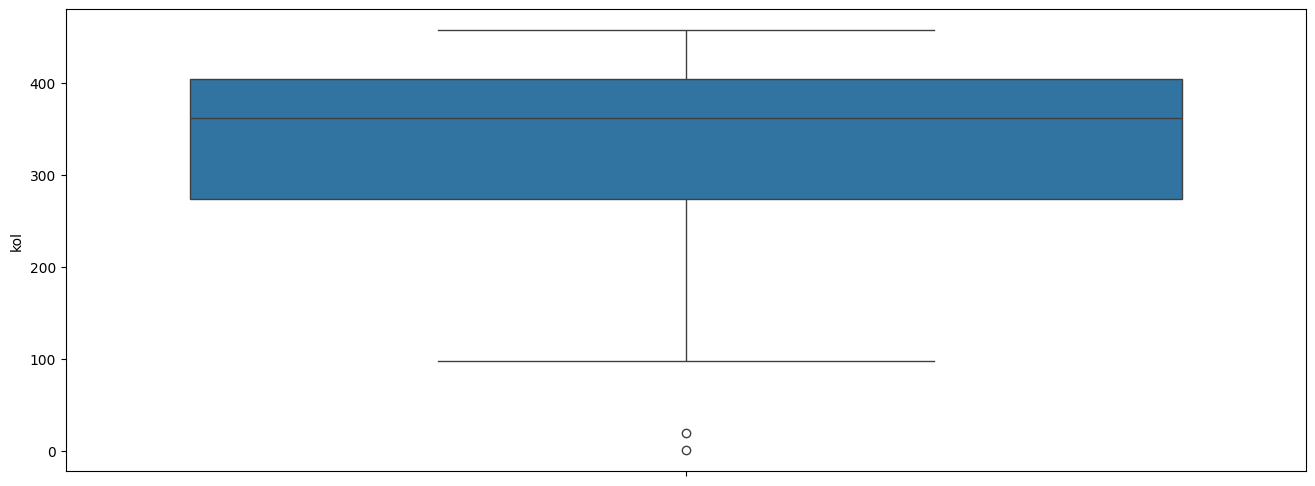

In [ ]:
# строим боксплот
sns.boxplot(gr)

In [ ]:
# группировка по большому количеству
a = df.groupby(['dt', 'nchk'])[['kol', 'roz', 'zak']].agg({
    'kol': 'sum', 
    'roz': ['sum', 'max'],
    'zak': 'sum'
})

In [157]:
a

kol     roz           zak
                  sum     sum    max    sum
dt         nchk                            
11.08.2022 1698  1.00  463.00 463.00 342.30
           1699  1.00  720.00 720.00 545.27
           1700  1.00   60.00  60.00  36.68
           1701  4.00  955.00 443.00 756.12
           1702  1.00   94.00  94.00  76.55
...               ...     ...    ...    ...
12.08.2022 8486  1.00  460.00 460.00 302.07
           8487  1.00  476.00 476.00 396.66
           8488  1.00  220.00 220.00 187.84
           8489 18.00 1089.00 180.00 778.61
           8490  3.00  869.00 775.00 626.13

[1941 rows x 4 columns]

In [ ]:
# у результата - мультииндекс
a.index

MultiIndex([('11.08.2022', 1698),
            ('11.08.2022', 1699),
            ('11.08.2022', 1700),
            ('11.08.2022', 1701),
            ('11.08.2022', 1702),
            ('11.08.2022', 1703),
            ('11.08.2022', 1704),
            ('11.08.2022', 1705),
            ('11.08.2022', 1706),
            ('11.08.2022', 1707),
            ...
            ('12.08.2022', 8481),
            ('12.08.2022', 8482),
            ('12.08.2022', 8483),
            ('12.08.2022', 8484),
            ('12.08.2022', 8485),
            ('12.08.2022', 8486),
            ('12.08.2022', 8487),
            ('12.08.2022', 8488),
            ('12.08.2022', 8489),
            ('12.08.2022', 8490)],
           names=['dt', 'nchk'], length=1941)

In [159]:
# сбросим мультииндекс и номер чека с датой стали просто столбцами
a.reset_index()

dt  nchk   kol     roz           zak
                         sum     sum    max    sum
0     11.08.2022  1698  1.00  463.00 463.00 342.30
1     11.08.2022  1699  1.00  720.00 720.00 545.27
2     11.08.2022  1700  1.00   60.00  60.00  36.68
3     11.08.2022  1701  4.00  955.00 443.00 756.12
4     11.08.2022  1702  1.00   94.00  94.00  76.55
...          ...   ...   ...     ...    ...    ...
1936  12.08.2022  8486  1.00  460.00 460.00 302.07
1937  12.08.2022  8487  1.00  476.00 476.00 396.66
1938  12.08.2022  8488  1.00  220.00 220.00 187.84
1939  12.08.2022  8489 18.00 1089.00 180.00 778.61
1940  12.08.2022  8490  3.00  869.00 775.00 626.13

[1941 rows x 6 columns]

In [161]:
# хотим посчитать прибыль за каждую дату по сотрудникам (разница между розницей и закупкой)
# группировка по дате, по сотрудникам. Только потом считаем
# не получится как в SQL select sum(col1-col2)
a = df.groupby(['dt', 'empl'])[['zak', 'roz']].agg('sum')

In [ ]:
# делаем новый столбец с расчетом
a['revenue'] = a['roz'] - a['zak']

In [163]:
a

zak       roz  revenue
dt         empl                            
11.08.2022 25   72004.24  93030.00 21025.76
           30   90350.41 111916.97 21566.56
           36   62425.32  77368.03 14942.71
           47   68458.33  86626.01 18167.68
           50   72304.41  90830.01 18525.60
           53   37727.08  48746.00 11018.92
           54   52880.81  67517.08 14636.27
           123  88926.21 116678.03 27751.82
           205  49904.42  59471.00  9566.58
           605  28699.65  36954.01  8254.36
12.08.2022 37   92688.93 118091.37 25402.44
           48   72773.60  93032.02 20258.42
           54   65852.52  83229.05 17376.53
           110  89126.47 113275.05 24148.58
           123  99298.80 124231.66 24932.86
           205  34772.17  44595.01  9822.84

In [169]:
# второй способ. apply после группировки. Применяет ко всем строкам функцию в скобке(!!!)
df.groupby(['dt', 'empl'])[['zak', 'roz', 'kol']].apply(lambda x: sum((x['roz'] - x['zak'])))

dt          empl
11.08.2022  25     21025.76
            30     21566.56
            36     14942.71
            47     18167.68
            50     18525.60
            53     11018.92
            54     14636.27
            123    27751.82
            205     9566.58
            605     8254.36
12.08.2022  37     25402.44
            48     20258.42
            54     17376.53
            110    24148.58
            123    24932.86
            205     9822.84
dtype: float64

In [171]:
#  но мы должны учесть еще и количество! а количество можно учесть только в apply, первым способом не выйдет
df.groupby(['dt', 'empl'])[['zak', 'roz', 'kol']].apply(lambda x: sum(x['kol']*(x['roz'] - x['zak'])))

dt          empl
11.08.2022  25     20642.29
            30     20328.67
            36     14090.04
            47     16983.79
            50     17384.41
            53     10056.40
            54     13981.47
            123    23756.34
            205     9724.19
            605     8341.71
12.08.2022  37     22613.80
            48     19244.82
            54     16801.83
            110    22711.32
            123    23167.41
            205     8873.30
dtype: float64

In [ ]:
# Оценить связь между объемом продажи и розничной ценой с разбивкой по датам. 
# Сгруппировать по дате и по позициям
df.columns

Index(['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol', 'zak', 'roz',
       'disc', 'pay_type', 'drug_id', 'suppl', 'disc_id', 'disc_barcode',
       'empl', 'vzak', 'pos', 'hour'],
      dtype='object')

In [173]:
import numpy as np

In [176]:
# разбиваем по датам и препаратам, считаем 'roz', 'kol' - розн цену и количество - среднее от цены
df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
    'roz': np.mean, 
    'kol': 'sum'
})

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\3938182001.py:2: FutureWarning: The provided callable <function mean at 0x000002633628C720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({


roz  kol
dt         drug                                                           
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.00 1.00
...                                                               ...  ...
12.08.2022 ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.00 2.00
           ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.00 1.00
           Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.00 1.00
           ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.00 2.00
           ЯРИНА №21 ТАБ. П/П/О                               1292.00 1.00

[2304 rows x 2 columns]

In [ ]:
# актуальный метод
df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
    'roz': 'mean', 
    'kol': 'sum'
})

roz  kol
dt         drug                                                           
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.00 1.00
...                                                               ...  ...
12.08.2022 ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.00 2.00
           ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.00 1.00
           Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.00 1.00
           ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.00 2.00
           ЯРИНА №21 ТАБ. П/П/О                               1292.00 1.00

[2304 rows x 2 columns]

In [180]:
# смотрим диапазон розничных цен. Округляем значения цен до ближайшей сотни
df['rroz'] = df.roz.apply(lambda x: round(x, -2))

C:\Users\Альбина\AppData\Local\Temp\ipykernel_16140\1863183308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rroz'] = df.roz.apply(lambda x: round(x, -2))


In [181]:
# группируем по дате и округленной цене. Считаем сумму проданных количеств. Индекс сбросить
a = df.groupby(['dt', 'rroz'])['kol'].agg('sum').reset_index()

In [183]:
a

,dt,rroz,kol
0,11.08.2022,0.00,770.00
1,11.08.2022,100.00,742.00
2,11.08.2022,200.00,328.43
3,11.08.2022,300.00,196.20
4,11.08.2022,400.00,133.00
...,...,...,...
68,12.08.2022,4400.00,1.00
69,12.08.2022,5000.00,1.00
70,12.08.2022,5800.00,1.00
71,12.08.2022,10200.00,1.00


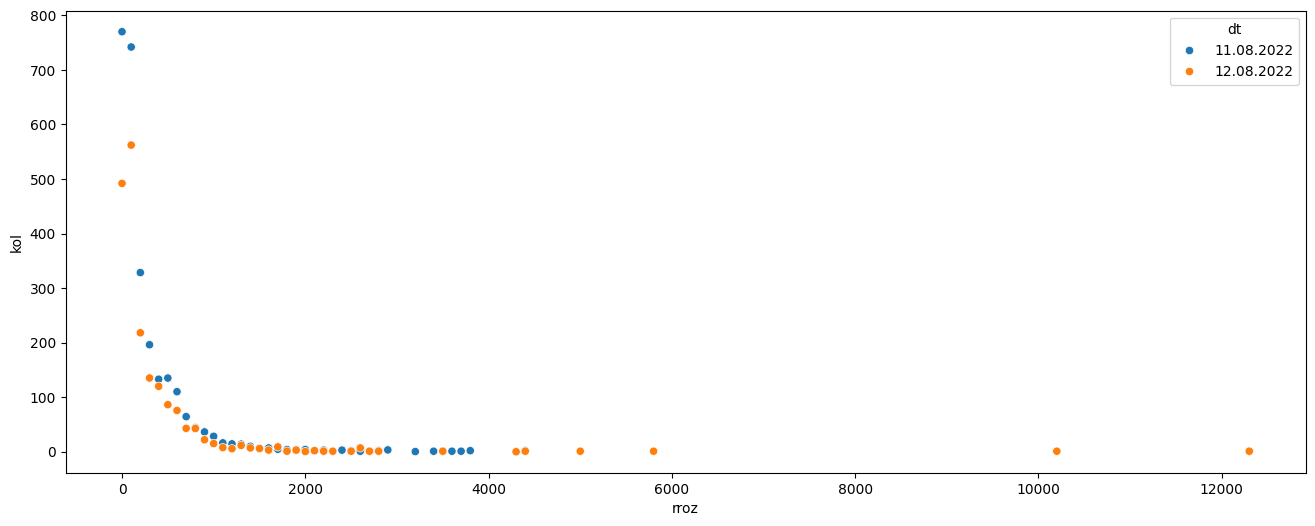

In [ ]:
# скаттерплот зависимость количества от округленной цены
sns.scatterplot(x=a.rroz, y=a.kol, hue=a.dt);

In [185]:
# фильтруем цену, чтобы меньше 2000
a = a[a.loc[:, 'rroz'] < 2000]

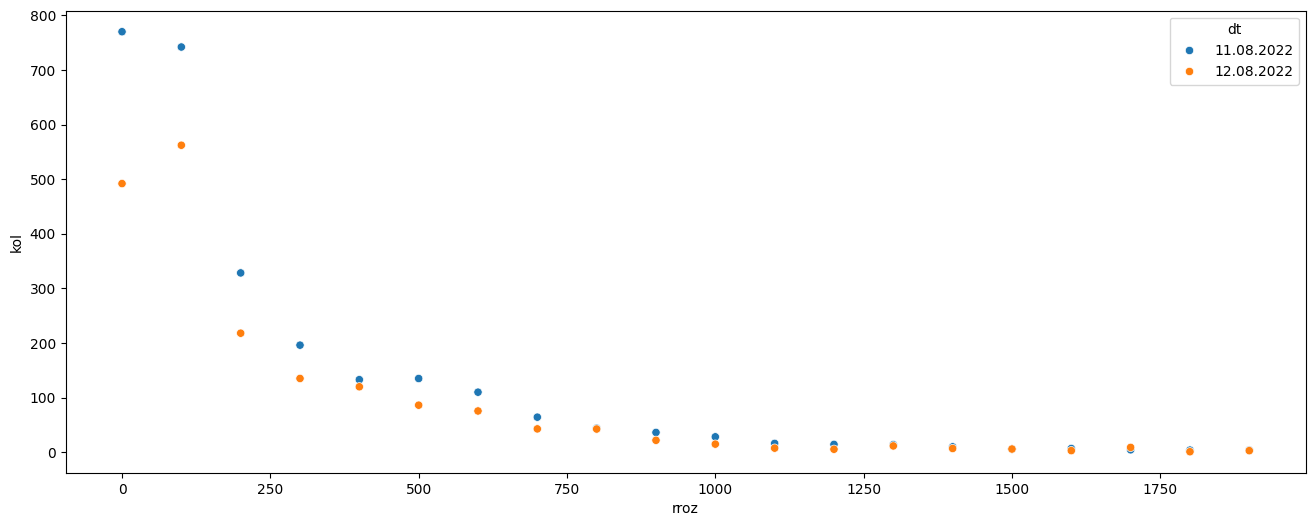

In [186]:
sns.scatterplot(x=a.rroz, y=a.kol, hue=a.dt);

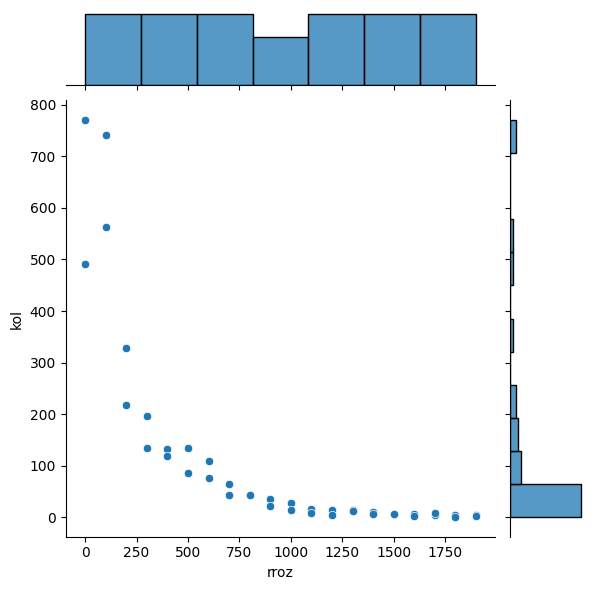

In [188]:
# можно другой график. Джойнплот
sns.jointplot(x=a.rroz, y=a.kol)

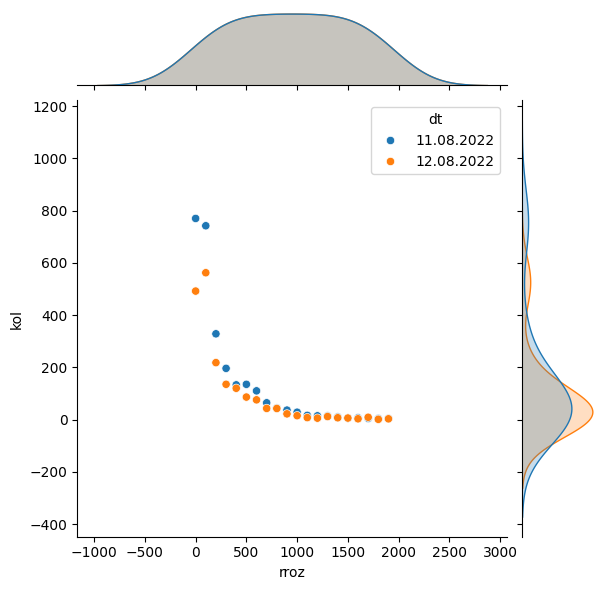

In [ ]:
# чуточку изменим , hue=a.dt - распределение переменных по датам
sns.jointplot(x=a.rroz, y=a.kol, hue=a.dt);

In [190]:
# Оцениь количество продаж в каждый день в каждой аптеке по каждому сотруднику 
# с разбивкой по видам платежа
# Группировкой
b = df.groupby(['dt', 'apt', 'empl', 'pay_type'])['kol'].agg('sum').reset_index()

In [191]:
b

,dt,apt,empl,pay_type,kol
0,11.08.2022,2,123,15,151.05
1,11.08.2022,2,123,18,164.13
2,11.08.2022,2,205,15,65.11
3,11.08.2022,2,205,18,66.00
4,11.08.2022,6,25,15,95.00
5,11.08.2022,6,25,18,142.53
6,11.08.2022,7,605,15,67.04
7,11.08.2022,7,605,18,101.85
8,11.08.2022,11,30,15,179.00
9,11.08.2022,11,30,18,310.48


In [ ]:
# Сводная таблица как в эксель. Кидаем значения ['pay_type'] в столбцы
b.pivot_table(values='kol', index=['dt', 'apt', 'empl'], columns=['pay_type'])

pay_type                15     18
dt         apt empl              
11.08.2022 2   123  151.05 164.13
               205   65.11  66.00
           6   25    95.00 142.53
           7   605   67.04 101.85
           11  30   179.00 310.48
           13  50   180.40 151.78
           15  53    51.98 142.10
           17  36    54.73 186.94
           18  47    89.04 236.24
               54    65.10 198.77
12.08.2022 2   123  210.50 152.72
               205   88.41  80.19
           6   37    72.92 207.89
           11  110   91.67 363.08
           18  48   134.79 222.65
               54    64.10 197.65

In [195]:
# а теперь тот же фокус для розничных сумм без промежуточных аггрегаций. из исходного df
c = df.pivot_table(values='roz', index=['dt', 'apt', 'empl'], columns=['pay_type'], aggfunc='sum')

In [196]:
c = c.reset_index()

In [197]:
c

pay_type,dt,apt,empl,15,18
0,11.08.2022,2,123,55981.01,60697.02
1,11.08.2022,2,205,27403.00,32068.00
2,11.08.2022,6,25,27402.00,65628.00
3,11.08.2022,7,605,17618.00,19336.01
4,11.08.2022,11,30,38692.32,73224.65
5,11.08.2022,13,50,44746.00,46084.01
6,11.08.2022,15,53,20155.00,28591.00
7,11.08.2022,17,36,20890.00,56478.03
8,11.08.2022,18,47,25685.01,60941.00
9,11.08.2022,18,54,12118.00,55399.08


In [ ]:
# Обратно. id_vars - переменные индексов, value_vars - столбцы, которые надо расформировать
# можно заодно переименовать 'pay_type' с помощью var_name
# Широкий вид - удобен для просмотра, длинный - для анализа
pd.melt(c, id_vars=['dt', 'apt', 'empl'], value_vars=[15, 18], var_name='p_type')

,dt,apt,empl,p_type,value
0,11.08.2022,2,123,15,55981.01
1,11.08.2022,2,205,15,27403.00
2,11.08.2022,6,25,15,27402.00
3,11.08.2022,7,605,15,17618.00
4,11.08.2022,11,30,15,38692.32
5,11.08.2022,13,50,15,44746.00
6,11.08.2022,15,53,15,20155.00
7,11.08.2022,17,36,15,20890.00
8,11.08.2022,18,47,15,25685.01
9,11.08.2022,18,54,15,12118.00


In [ ]:
# Найти позиции, где было продано более 5 штук сразу или розничная цена больше 2000
df[['zak', 'roz']]

,zak,roz
0,41.08,51.00
1,18.61,31.00
2,132.69,209.00
3,133.65,210.00
4,709.95,787.00
...,...,...
4457,47.88,75.00
4458,59.51,93.00
4459,297.74,396.00
4460,322.06,419.00


In [282]:
df.zak

0       41.08
1       18.61
2      132.69
3      133.65
4      709.95
        ...  
4457    47.88
4458    59.51
4459   297.74
4460   322.06
4461   238.62
Name: zak, Length: 4462, dtype: float64

In [ ]:
# Срезы . 2:5 - строки, 1:5 - столбцы. iloc - принимает только индексы
df.iloc[2:5, 1:5]

,c_time,nchk,ndoc,apt
2,10:27:46,2174,2004598,2
3,10:27:46,2174,2004598,2
4,10:33:56,2175,2004598,2


In [ ]:
# loc - принимает лейблы
df.loc[2, 'zak']

132.69

In [202]:
df.loc[2:5, ['zak', 'ndoc']]

,zak,ndoc
2,132.69,2004598
3,133.65,2004598
4,709.95,2004598
5,152.90,2004598


In [ ]:
# единичные значения, без диапазонов
df.at[2, "zak"]

132.69

In [286]:
df.iat[2, 5]

'СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ 125МЛ.'

In [ ]:
# фильтрация
(df['kol'] > 5) & (df['roz'] > 50)

0       False
1       False
2       False
3       False
4       False
        ...  
4457    False
4458    False
4459    False
4460    False
4461    False
Length: 4462, dtype: bool

In [ ]:
# фильтрация. Или
df[(df['kol'] > 5) | (df['roz'] > 2000)].head(2)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
27,11.08.2022,11:50:16,2184,2004598,2,АКАТИНОЛ МЕМАНТИН 20МГ. №28 ТАБ. П/П/О /МЕРЦ Ф...,1.00,2545.84,2824.00,141.00,15,153467,ВИТТА КОМПАНИ ООО,9,200010014079,205,Обычный,1.00,11,2800.00
29,11.08.2022,11:50:16,2184,2004598,2,ПРАДАКСА 110МГ. №60 КАПС. /БЕРИНГЕР/,1.00,3076.03,3432.00,171.00,15,154600,Протек,9,200010014079,205,Обычный,5.00,11,3400.00


In [ ]:
# фильтрация. И

df[(df['kol'] > 5) & (df['roz'] > 50)]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
1151,11.08.2022,13:10:36,5115,6003620,6,СФМ СИСТЕМА Д/ПЕРЕЛИВ. ИНФУЗ. Р-РОВ №1 ПЛАСТ.И...,10.00,29.80,52.00,62.00,15,422260,Пульс,35,200000000022,25,Обычный,9.00,13,100.00


In [ ]:
# Найти позиции, где тип платежа не 15 и не 20 
# НЕ (все строки колонки 'pay_type' , равные 15 или 20) isin - значения как в SQL: where col in ( )
df[~df.loc[:, 'pay_type'].isin([15, 20])].head(2)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,100.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,800.00


In [ ]:
# Для примера. Ищем значения Nan
pd.DataFrame({'a': [1, 2, None, 4, None], 'b': [1, 2, 5, 4, 5]}).isnull().any()

a     True
b    False
dtype: bool

In [ ]:
# Обе функции работают одинаково. Потому что Пандас создавался на основании R, просто дань уважения
pd.DataFrame({'a': [1, 2, None, 4, None], 'b': [1, 2, 5, 4, 5]}).isna().any()

a     True
b    False
dtype: bool

In [ ]:
# Перекодировать Вид закупки. Использовать вместо реплейсов
# Сделали словарь
d ={
    'Обычный': 'Simple',
    'Интернет': 'Web'
}

# По маппингу заменили значения
df['vzak'].map(d)

0       Simple
1       Simple
2       Simple
3       Simple
4       Simple
         ...  
4457    Simple
4458    Simple
4459    Simple
4460    Simple
4461    Simple
Name: vzak, Length: 4462, dtype: object

# Домашка

In [217]:
import pandas as pd
df = pd.read_csv('itresume-users-pandas.csv', sep = ';', encoding='1251', skiprows = 1)
df.head()

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46


In [ ]:
df['weekday'] = pd.to_datetime(df['date_joined']).dt.day_name()
df['date'] = pd.to_datetime(df['date_joined']).dt.date

In [238]:
df

,id,username,date_joined,weekday,date,cohort
0,416,nsosabisfsobm,2022-01-02 12:22:43,Воскресенье,2022-01-02,YYYY-MM
1,43,NbabnnbTona,2021-07-01 09:11:42,Вторник,2021-07-01,YYYY-MM
2,50,jbdn,2021-08-04 09:01:56,Среда,2021-08-04,YYYY-MM
3,249,Kbaoxsnb,2021-11-27 07:03:35,Суббота,2021-11-27,YYYY-MM
4,77,bxakbasmo$$$,2021-11-09 14:31:46,Четверг,2021-11-09,YYYY-MM
...,...,...,...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23,Суббота,2022-01-29,YYYY-MM
96,947,NaN,2022-01-29 18:31:26,Суббота,2022-01-29,YYYY-MM
97,1050,nsosabndsi,2022-02-01 21:02:59,Четверг,2022-02-01,YYYY-MM
98,1076,SbsdSaobdox,2022-02-02 19:31:21,Среда,2022-02-02,YYYY-MM


In [227]:
d ={
    'Sunday': 'Воскресенье',
    'Monday': 'Понедельник',
    'Thursday': 'Вторник',
    'Wednesday': 'Среда' ,
    'Tuesday': 'Четверг' ,
    'Friday': 'Пятница' ,
    'Saturday': 'Суббота' 
}

# По маппингу заменили значения
df['weekday'] = df['weekday'].map(d)

In [229]:
res = df.groupby(['weekday'])[['id','date']].agg({
    'id':'count',
    'date': 'nunique'
     }).reset_index()

In [230]:
res

,weekday,id,date
0,Воскресенье,11,6
1,Вторник,15,7
2,Понедельник,18,6
3,Пятница,9,6
4,Среда,19,11
5,Суббота,16,8
6,Четверг,12,7


In [81]:

day_name = pd.to_datetime(df['date_joined']).dt.day_name()

list(day_name)

['Sunday',
 'Thursday',
 'Wednesday',
 'Saturday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Friday',
 'Monday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Monday',
 'Wednesday',
 'Saturday',
 'Friday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Saturday',
 'Saturday',
 'Monday',
 'Monday',
 'Monday',
 'Monday',
 'Wednesday',
 'Friday',
 'Sunday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Saturday',
 'Tuesday',
 'Wednesday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',


In [89]:
from collections import Counter
registrations_by_wd = Counter(list(day_name))
dict(registrations_by_wd.most_common())

{'Wednesday': 19,
 'Monday': 18,
 'Saturday': 16,
 'Thursday': 15,
 'Tuesday': 12,
 'Sunday': 11,
 'Friday': 9}

In [ ]:
df = df[df['id']>=94]

,id,username,date_joined,weekday,date
0,416,nsosabisfsobm,2022-01-02 12:22:43,Воскресенье,2022-01-02
3,249,Kbaoxsnb,2021-11-27 07:03:35,Суббота,2021-11-27
7,2633,Eabx,2022-04-06 08:52:40,Среда,2022-04-06
9,2777,Jonns21241412,2022-04-18 09:33:09,Понедельник,2022-04-18
10,217,fnoxonsnbkbxsnb,2021-11-24 16:05:45,Среда,2021-11-24
...,...,...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23,Суббота,2022-01-29
96,947,NaN,2022-01-29 18:31:26,Суббота,2022-01-29
97,1050,nsosabndsi,2022-02-01 21:02:59,Четверг,2022-02-01
98,1076,SbsdSaobdox,2022-02-02 19:31:21,Среда,2022-02-02


In [234]:
df[(df['id']>=94)&(~df.loc[:, 'username'].isin(['fnoxonsnbkbxsnb', 'Jonns21241412', 'fbxbnsn']))]

,id,username,date_joined,weekday,date
0,416,nsosabisfsobm,2022-01-02 12:22:43,Воскресенье,2022-01-02
3,249,Kbaoxsnb,2021-11-27 07:03:35,Суббота,2021-11-27
7,2633,Eabx,2022-04-06 08:52:40,Среда,2022-04-06
12,219,Sbjssb,2021-11-24 17:11:49,Среда,2021-11-24
13,220,Nsobdbs78,2021-11-24 17:25:31,Среда,2021-11-24
...,...,...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23,Суббота,2022-01-29
96,947,NaN,2022-01-29 18:31:26,Суббота,2022-01-29
97,1050,nsosabndsi,2022-02-01 21:02:59,Четверг,2022-02-01
98,1076,SbsdSaobdox,2022-02-02 19:31:21,Среда,2022-02-02


In [ ]:
df['cohort'] = pd.to_datetime(df['date_joined']).dt.strftime('%Y-%m')

In [240]:
df

,id,username,date_joined,weekday,date,cohort
0,416,nsosabisfsobm,2022-01-02 12:22:43,Воскресенье,2022-01-02,2022-01
1,43,NbabnnbTona,2021-07-01 09:11:42,Вторник,2021-07-01,2021-07
2,50,jbdn,2021-08-04 09:01:56,Среда,2021-08-04,2021-08
3,249,Kbaoxsnb,2021-11-27 07:03:35,Суббота,2021-11-27,2021-11
4,77,bxakbasmo$$$,2021-11-09 14:31:46,Четверг,2021-11-09,2021-11
...,...,...,...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23,Суббота,2022-01-29,2022-01
96,947,NaN,2022-01-29 18:31:26,Суббота,2022-01-29,2022-01
97,1050,nsosabndsi,2022-02-01 21:02:59,Четверг,2022-02-01,2022-02
98,1076,SbsdSaobdox,2022-02-02 19:31:21,Среда,2022-02-02,2022-02


In [242]:
df.cohort.value_counts(normalize=True)*100

cohort
2021-11   40.00
2021-12   29.00
2022-01   24.00
2022-02    3.00
2022-04    2.00
2021-07    1.00
2021-08    1.00
Name: proportion, dtype: float64

In [247]:
df = pd.read_csv('itresume-coderun.csv', sep = ',', encoding='1251')
df 

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [248]:
df['cohort'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m')

In [251]:
df

,id,created_at,problem_id,user_id,language_id,cohort,language
0,1,2021-04-07 06:06:20.000,13,10,3,2021-04,Python
1,2,2021-03-31 07:10:06.000,15,13,3,2021-03,Python
2,3,2021-04-04 14:55:26.000,1,6,3,2021-04,Python
3,4,2021-03-29 21:24:51.000,26,4,3,2021-03,Python
4,5,2021-03-30 11:29:12.000,21,18,3,2021-03,Python
...,...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,2022-05,SQL
55718,55719,2022-05-17 09:01:04.210,101,171,2,2022-05,SQL
55719,55720,2022-05-17 09:02:06.203,101,171,2,2022-05,SQL
55720,55721,2022-05-17 09:03:45.265,102,171,2,2022-05,SQL


In [250]:
d ={
    3: 'Python',
    2: 'SQL'
}
df['language'] = df['language_id'].map(d)

In [255]:
df[df['cohort']>'2021-12']

,id,created_at,problem_id,user_id,language_id,cohort,language
7333,7334,2022-01-01 00:03:34.826,54,342,3,2022-01,Python
7334,7335,2022-01-01 00:04:13.721,54,342,3,2022-01,Python
7335,7336,2022-01-01 00:16:28.729,48,342,3,2022-01,Python
7336,7337,2022-01-01 00:16:44.156,48,342,3,2022-01,Python
7337,7338,2022-01-01 00:17:25.300,48,342,3,2022-01,Python
...,...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,2022-05,SQL
55718,55719,2022-05-17 09:01:04.210,101,171,2,2022-05,SQL
55719,55720,2022-05-17 09:02:06.203,101,171,2,2022-05,SQL
55720,55721,2022-05-17 09:03:45.265,102,171,2,2022-05,SQL


In [257]:
df = df[df['cohort']>'2021-12'].pivot_table(values='user_id', index=['cohort'], columns=['language'], aggfunc='count')

In [258]:
df

language,Python,SQL
cohort,,
2022-01,1606,10182
2022-02,2015,10934
2022-03,1487,6938
2022-04,3428,8117
2022-05,574,3108


In [253]:
df.groupby(['cohort', 'language'])[['user_id']].agg({'count'}).reset_index()

,cohort,language,user_id
,,,count
0,2021-03,Python,7
1,2021-04,Python,23
2,2021-06,Python,208
3,2021-07,Python,56
4,2021-09,Python,240
5,2021-09,SQL,7
6,2021-10,Python,49
7,2021-10,SQL,190
8,2021-11,Python,823
